# World Happiness Report 

## Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

## What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

## What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

## What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.

## Dataset Link-

https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/World%20Happiness/happiness_score_dataset.csv


# Import Necessaey Libraries

In [100]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [101]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [103]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# Data Analysis and Data Visualisation

In [104]:
# Highligting the maximum values of each attribute in the data set

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]

df.style.apply(highlight_max)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587000,0.034110,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380
1,Iceland,Western Europe,2,7.561000,0.048840,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010
2,Denmark,Western Europe,3,7.527000,0.033280,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040
3,Norway,Western Europe,4,7.522000,0.038800,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310
4,Canada,North America,5,7.427000,0.035530,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760
5,Finland,Western Europe,6,7.406000,0.031400,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,2.619550
6,Netherlands,Western Europe,7,7.378000,0.027990,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,2.465700
7,Sweden,Western Europe,8,7.364000,0.031570,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,2.371190
8,New Zealand,Australia and New Zealand,9,7.286000,0.033710,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,2.264250
9,Australia,Australia and New Zealand,10,7.284000,0.040830,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,2.266460


# Exploratory Data Analysis(EDA)

In [105]:
# Checking the dimention of the dataset
df.shape

(158, 12)

This Datasetcontains 158 rows and 12 columns. Out of Which 1 is the target variable and remaining 11 are independent variable.

In [106]:
df.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [107]:
# Checking type of columns
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

There are three type of data available in this dataset (Object, Int and Float).

In [108]:
# Checking Null values in the dataset
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

As we can see no null value present in this dataset.

In [110]:
df['Region'].unique().tolist()

['Western Europe',
 'North America',
 'Australia and New Zealand',
 'Middle East and Northern Africa',
 'Latin America and Caribbean',
 'Southeastern Asia',
 'Central and Eastern Europe',
 'Eastern Asia',
 'Sub-Saharan Africa',
 'Southern Asia']

In [111]:
df['Happiness Rank'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158], dtype=int64)

In [112]:
df['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

We can see in contry and happiness rank not have multiple data in this datasets

In [113]:
df['Happiness Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [114]:
df['Standard Error'].unique()

array([0.03411, 0.04884, 0.03328, 0.0388 , 0.03553, 0.0314 , 0.02799,
       0.03157, 0.03371, 0.04083, 0.0347 , 0.04454, 0.03751, 0.04176,
       0.03839, 0.04076, 0.03499, 0.03676, 0.03595, 0.03729, 0.01866,
       0.05335, 0.06476, 0.0378 , 0.0491 , 0.01848, 0.058  , 0.06257,
       0.03512, 0.04612, 0.04168, 0.04539, 0.05051, 0.03557, 0.04633,
       0.03468, 0.04206, 0.03868, 0.04456, 0.09811, 0.10895, 0.05618,
       0.05224, 0.04361, 0.04267, 0.03581, 0.04098, 0.04528, 0.05412,
       0.03914, 0.05642, 0.03799, 0.04563, 0.04114, 0.04251, 0.03843,
       0.05371, 0.04615, 0.03938, 0.04263, 0.0433 , 0.04394, 0.07832,
       0.03135, 0.13693, 0.05635, 0.0558 , 0.05099, 0.05018, 0.04175,
       0.07197, 0.04013, 0.02596, 0.03107, 0.03864, 0.03823, 0.04192,
       0.03225, 0.03363, 0.03726, 0.04524, 0.05235, 0.02424, 0.06988,
       0.06607, 0.04864, 0.04802, 0.0464 , 0.04934, 0.06161, 0.0342 ,
       0.05376, 0.07896, 0.05013, 0.06913, 0.09438, 0.07446, 0.06698,
       0.03313, 0.08

In [115]:
df['Economy (GDP per Capita)'].unique()

array([1.39651, 1.30232, 1.32548, 1.459  , 1.32629, 1.29025, 1.32944,
       1.33171, 1.25018, 1.33358, 1.22857, 0.95578, 1.33723, 1.02054,
       1.39451, 0.98124, 1.56391, 1.33596, 1.30782, 1.42727, 1.26637,
       1.36011, 1.04424, 1.52186, 1.06353, 1.32792, 1.10715, 1.69042,
       1.27778, 1.05351, 1.17898, 1.06166, 0.91861, 0.9669 , 1.39541,
       1.23011, 1.2074 , 1.29098, 1.55422, 0.99534, 1.21183, 0.76454,
       0.74553, 0.63244, 1.16891, 1.27074, 1.24461, 0.86402, 1.32376,
       1.25114, 0.68133, 0.59448, 0.75985, 1.12254, 1.18498, 1.14723,
       0.59325, 0.90019, 1.03192, 1.12555, 1.12486, 1.08254, 1.13145,
       1.13764, 0.81038, 1.20806, 1.20813, 0.93929, 0.80148, 0.95847,
       1.00761, 1.38604, 1.15174, 0.82827, 0.63216, 1.06098, 0.47428,
       0.65435, 0.77042, 1.02389, 0.59543, 0.90198, 0.97438, 0.89012,
       0.47038, 1.04345, 0.92053, 1.15991, 1.11312, 0.70532, 0.18847,
       0.73479, 0.91851, 0.08308, 0.87867, 0.83223, 0.37545, 0.89537,
       0.59066, 0.82

In [116]:
df['Family'].unique()

array([1.34951, 1.40223, 1.36058, 1.33095, 1.32261, 1.31826, 1.28017,
       1.28907, 1.31967, 1.30923, 1.22393, 1.23788, 1.29704, 0.91451,
       1.24711, 1.23287, 1.21963, 1.36948, 1.28566, 1.12575, 1.28548,
       1.08182, 1.25596, 1.02   , 1.1985 , 1.29937, 1.12447, 1.0786 ,
       1.26038, 1.24823, 1.20643, 1.2089 , 1.24018, 1.26504, 1.08393,
       1.31379, 1.30203, 1.07617, 1.16594, 0.972  , 1.18354, 1.02507,
       1.04356, 1.34043, 1.26999, 1.25712, 0.95774, 0.99903, 1.21624,
       1.19777, 0.97841, 1.01528, 1.30477, 1.12241, 1.27385, 1.25745,
       1.14184, 0.97459, 1.23289, 1.27948, 1.07023, 0.79624, 1.11862,
       1.23617, 1.15102, 1.07008, 0.89318, 1.07772, 0.81198, 1.22668,
       0.98521, 1.05818, 1.22791, 1.08708, 0.91226, 0.94632, 1.15115,
       0.90432, 1.10395, 0.93793, 0.41411, 1.05392, 0.90557, 0.94675,
       0.91612, 0.88588, 1.00964, 1.13935, 1.09562, 1.03516, 0.95152,
       0.64095, 1.00232, 1.02626, 0.80434, 0.91916, 1.04103, 1.17202,
       0.73803, 1.30

In [117]:
df['Health (Life Expectancy)'].unique()

array([0.94143, 0.94784, 0.87464, 0.88521, 0.90563, 0.88911, 0.89284,
       0.91087, 0.90837, 0.93156, 0.91387, 0.86027, 0.89042, 0.81444,
       0.86179, 0.69702, 0.91894, 0.89533, 0.89667, 0.80925, 0.90943,
       0.76276, 0.72052, 1.02525, 0.79661, 0.89186, 0.85857, 0.79733,
       0.94579, 0.78723, 0.84483, 0.8116 , 0.69077, 0.7385 , 0.72025,
       0.95562, 0.88721, 0.8753 , 0.72492, 0.6082 , 0.61483, 0.67737,
       0.64425, 0.59772, 0.78902, 0.99111, 0.96538, 0.79075, 0.74716,
       0.95446, 0.5392 , 0.61826, 0.66098, 0.64368, 0.87337, 0.73128,
       0.74314, 0.73017, 0.73608, 0.77903, 0.72394, 0.78805, 0.7038 ,
       0.66926, 0.68741, 0.92356, 0.61766, 0.63132, 0.53886, 0.7095 ,
       1.01328, 0.77361, 0.63793, 0.74676, 0.73172, 0.65088, 0.16007,
       0.57407, 0.64045, 0.51466, 0.69639, 0.72521, 0.81658, 0.29924,
       0.7689 , 0.74836, 0.87519, 0.72437, 0.58114, 0.43873, 0.60954,
       0.73545, 0.09131, 0.81325, 0.79081, 0.07612, 0.66825, 0.54909,
       0.60268, 0.07

In [118]:
df['Freedom'].unique()

array([0.66557, 0.62877, 0.64938, 0.66973, 0.63297, 0.64169, 0.61576,
       0.6598 , 0.63938, 0.65124, 0.41319, 0.63376, 0.62433, 0.48181,
       0.54604, 0.49049, 0.61583, 0.61777, 0.5845 , 0.64157, 0.59625,
       0.63274, 0.42908, 0.54252, 0.5421 , 0.61477, 0.44132, 0.6404 ,
       0.55011, 0.44974, 0.46364, 0.60362, 0.53466, 0.55664, 0.31048,
       0.45951, 0.60365, 0.3974 , 0.55499, 0.59657, 0.55884, 0.4035 ,
       0.57733, 0.65821, 0.31751, 0.49615, 0.33208, 0.48574, 0.45492,
       0.26236, 0.57414, 0.32818, 0.53899, 0.51649, 0.60855, 0.21342,
       0.55475, 0.41496, 0.37938, 0.53122, 0.53024, 0.25883, 0.41668,
       0.36679, 0.50442, 0.49027, 0.40672, 0.28579, 0.24749, 0.4761 ,
       0.56066, 0.59608, 0.44888, 0.46611, 0.59444, 0.22815, 0.43477,
       0.34334, 0.53206, 0.3703 , 0.12102, 0.40661, 0.1826 , 0.51697,
       0.48827, 0.35068, 0.20107, 0.51469, 0.29671, 0.62545, 0.46582,
       0.41691, 0.33457, 0.34037, 0.35733, 0.09245, 0.31767, 0.57672,
       0.59591, 0.43

In [119]:
df['Trust (Government Corruption)'].unique()

array([0.41978, 0.14145, 0.48357, 0.36503, 0.32957, 0.41372, 0.31814,
       0.43844, 0.42922, 0.35637, 0.07785, 0.10583, 0.18676, 0.21312,
       0.1589 , 0.17521, 0.37798, 0.28703, 0.2254 , 0.38583, 0.32067,
       0.32524, 0.11069, 0.4921 , 0.0927 , 0.21843, 0.12869, 0.52208,
       0.20646, 0.08484, 0.02652, 0.24558, 0.0512 , 0.03187, 0.06398,
       0.13586, 0.08129, 0.25609, 0.13633, 0.0114 , 0.11776, 0.09472,
       0.30826, 0.03431, 0.1806 , 0.07857, 0.1809 , 0.306  , 0.02901,
       0.088  , 0.01615, 0.08242, 0.08454, 0.03787, 0.01031, 0.19317,
       0.05989, 0.1909 , 0.04212, 0.10501, 0.0243 , 0.11023, 0.03005,
       0.02299, 0.1428 , 0.06146, 0.17383, 0.04741, 0.30844, 0.07521,
       0.37124, 0.15184, 0.     , 0.10441, 0.15746, 0.04232, 0.0403 ,
       0.15445, 0.16065, 0.10464, 0.14293, 0.14296, 0.02781, 0.12468,
       0.00649, 0.02617, 0.01078, 0.06332, 0.12279, 0.39928, 0.08546,
       0.05327, 0.15603, 0.06413, 0.00227, 0.12504, 0.14234, 0.24249,
       0.02666, 0.03

In [120]:
df['Generosity'].unique()

array([0.29678, 0.4363 , 0.34139, 0.34699, 0.45811, 0.23351, 0.4761 ,
       0.36262, 0.47501, 0.43562, 0.33172, 0.25497, 0.33088, 0.14074,
       0.40105, 0.14574, 0.28034, 0.45901, 0.2225 , 0.26428, 0.51912,
       0.21542, 0.05841, 0.31105, 0.24434, 0.28214, 0.33363, 0.32573,
       0.12332, 0.11451, 0.10686, 0.2324 , 0.18401, 0.5763 , 0.13706,
       0.18227, 0.51752, 0.25376, 0.16228, 0.16991, 0.31844, 0.10692,
       0.27489, 0.22837, 0.16893, 0.10705, 0.18557, 0.11541, 0.17362,
       0.22823, 0.20536, 0.20951, 0.3424 , 0.11827, 0.25328, 0.02641,
       0.27815, 0.14982, 0.11046, 0.16759, 0.33075, 0.05444, 0.18295,
       0.00199, 0.2123 , 0.26169, 0.30638, 0.07822, 0.2831 , 0.16979,
       0.37744, 0.39478, 0.0868 , 0.51535, 0.1686 , 0.12253, 0.3003 ,
       0.27233, 0.47998, 0.07799, 0.33671, 0.11053, 0.1614 , 0.08185,
       0.19591, 0.13748, 0.19231, 0.13719, 0.18226, 0.24991, 0.50318,
       0.07172, 0.22359, 0.22269, 0.14272, 0.24808, 0.16388, 0.21684,
       0.42192, 0.33

In [121]:
df['Dystopia Residual'].unique()

array([2.51738, 2.70201, 2.49204, 2.46531, 2.45176, 2.61955, 2.4657 ,
       2.37119, 2.26425, 2.26646, 3.08854, 3.17728, 2.5332 , 3.60214,
       2.51011, 3.26001, 1.96961, 1.9757 , 2.41484, 2.24743, 1.96994,
       2.47489, 3.19131, 1.88501, 2.84848, 2.11569, 2.67585, 1.55674,
       2.21126, 2.836  , 2.67782, 2.32142, 2.85737, 2.31945, 2.43872,
       2.12367, 1.6488 , 2.32323, 1.87634, 2.79094, 2.26882, 3.035  ,
       2.74255, 2.23741, 2.24639, 1.68435, 2.21978, 2.53942, 1.73797,
       2.02518, 2.82334, 3.10712, 2.18896, 2.24729, 1.61583, 2.44649,
       2.32407, 2.5945 , 2.1309 , 1.86565, 1.88541, 2.75414, 2.09066,
       2.27394, 2.32038, 1.59888, 1.88931, 2.43209, 2.76579, 1.86984,
       1.76145, 0.65429, 1.58782, 1.86399, 2.20173, 2.08528, 2.2327 ,
       2.89319, 1.63794, 2.00073, 3.10709, 1.87996, 2.10017, 1.8604 ,
       2.6343 , 1.93129, 2.025  , 1.26462, 1.62215, 1.7536 , 2.11032,
       2.45373, 1.73933, 3.05137, 1.89894, 2.06367, 2.79832, 1.21305,
       1.73799, 1.34

We can See above in unique values almost 0 values in 6 columns (Generosity, Trust(Govenment Corruption), Freedom, Helth(life expectancy), Family, and Economy (GDP per capital))

In [122]:
#Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Country
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: count, Length: 158, dtype: int64


Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64


Happiness Rank
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: count, Length: 157, dtype: int64


Happiness Score
5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: count, Length: 157, dtype: int64


Standard Error
0

# Data Visualization

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

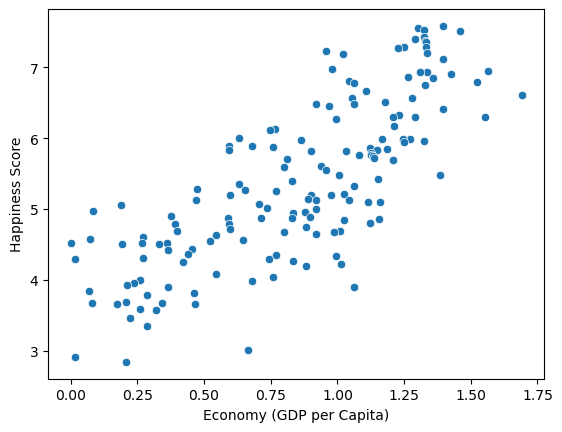

In [123]:
# visualise data using scatterplot
sns.scatterplot(x="Economy (GDP per Capita)",y="Happiness Score",data=df)

<Axes: xlabel='Family', ylabel='Happiness Score'>

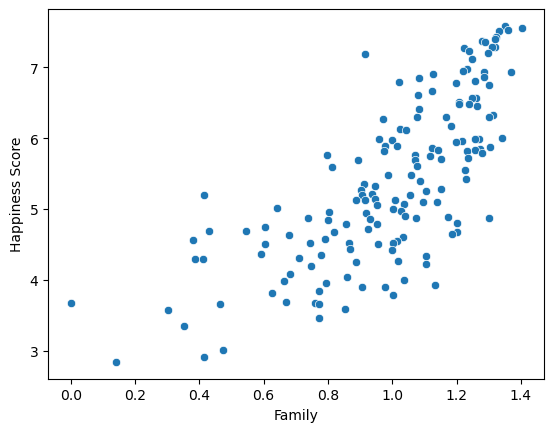

In [124]:
sns.scatterplot(x="Family",y="Happiness Score",data=df)

<Axes: xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

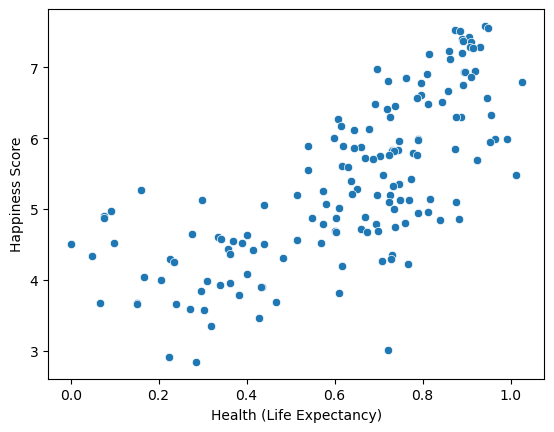

In [125]:
sns.scatterplot(x="Health (Life Expectancy)",y="Happiness Score",data=df)

<Axes: xlabel='Freedom', ylabel='Happiness Score'>

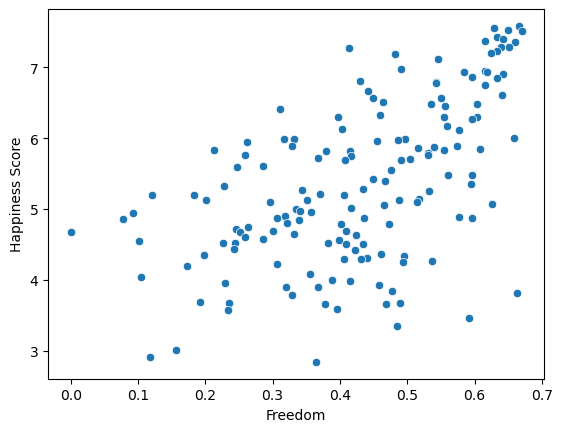

In [126]:
sns.scatterplot(x="Freedom",y="Happiness Score",data=df)

<Axes: xlabel='Generosity', ylabel='Happiness Score'>

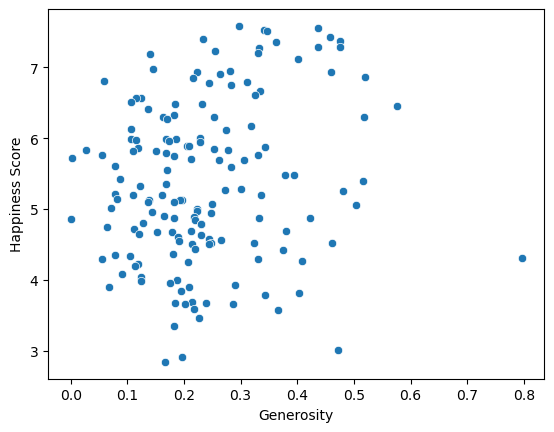

In [127]:
sns.scatterplot(x="Generosity",y="Happiness Score",data=df)

<Axes: xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

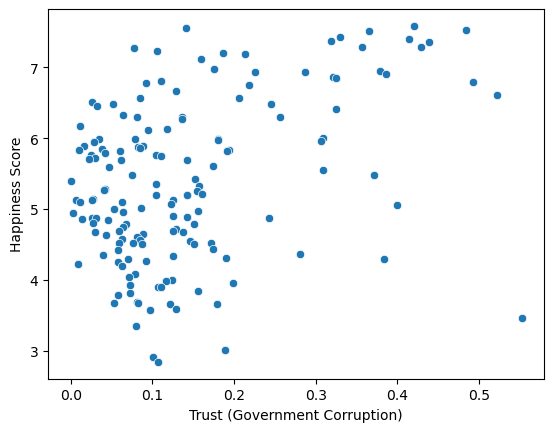

In [128]:
sns.scatterplot(x="Trust (Government Corruption)",y="Happiness Score",data=df)

# Top 10 Countries for each attribute

<Axes: xlabel='Freedom', ylabel='Country'>

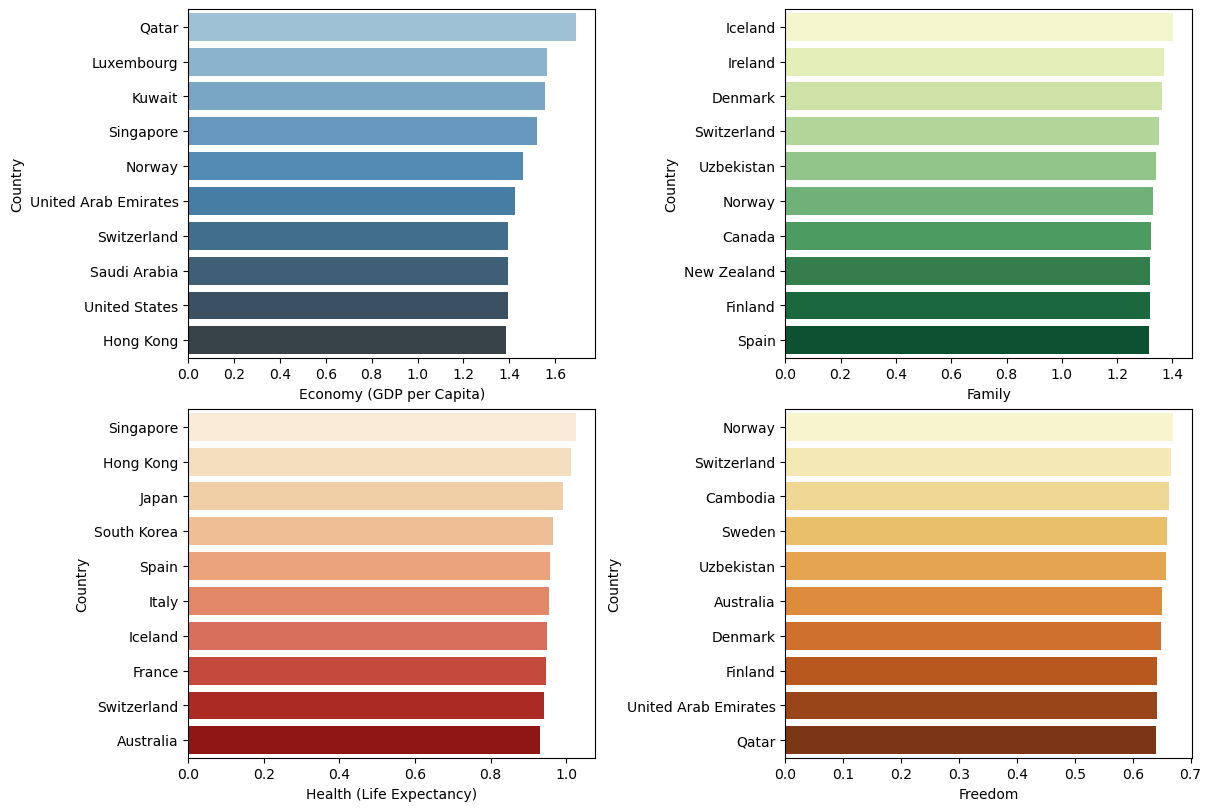

In [129]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x ='Economy (GDP per Capita)', y='Country', 
            data = df.nlargest(10,'Economy (GDP per Capita)'), ax=axes[0,0], palette="Blues_d")

sns.barplot(x='Family', y='Country',
            data = df.nlargest(10,'Family'), ax=axes[0,1], palette="YlGn")

sns.barplot(x='Health (Life Expectancy)', y='Country',
            data = df.nlargest(10,'Health (Life Expectancy)'), ax=axes[1,0], palette='OrRd')

sns.barplot(x='Freedom', y='Country', 
            data = df.nlargest(10,'Freedom'), ax=axes[1,1], palette='YlOrBr')

<Axes: xlabel='Trust (Government Corruption)', ylabel='Country'>

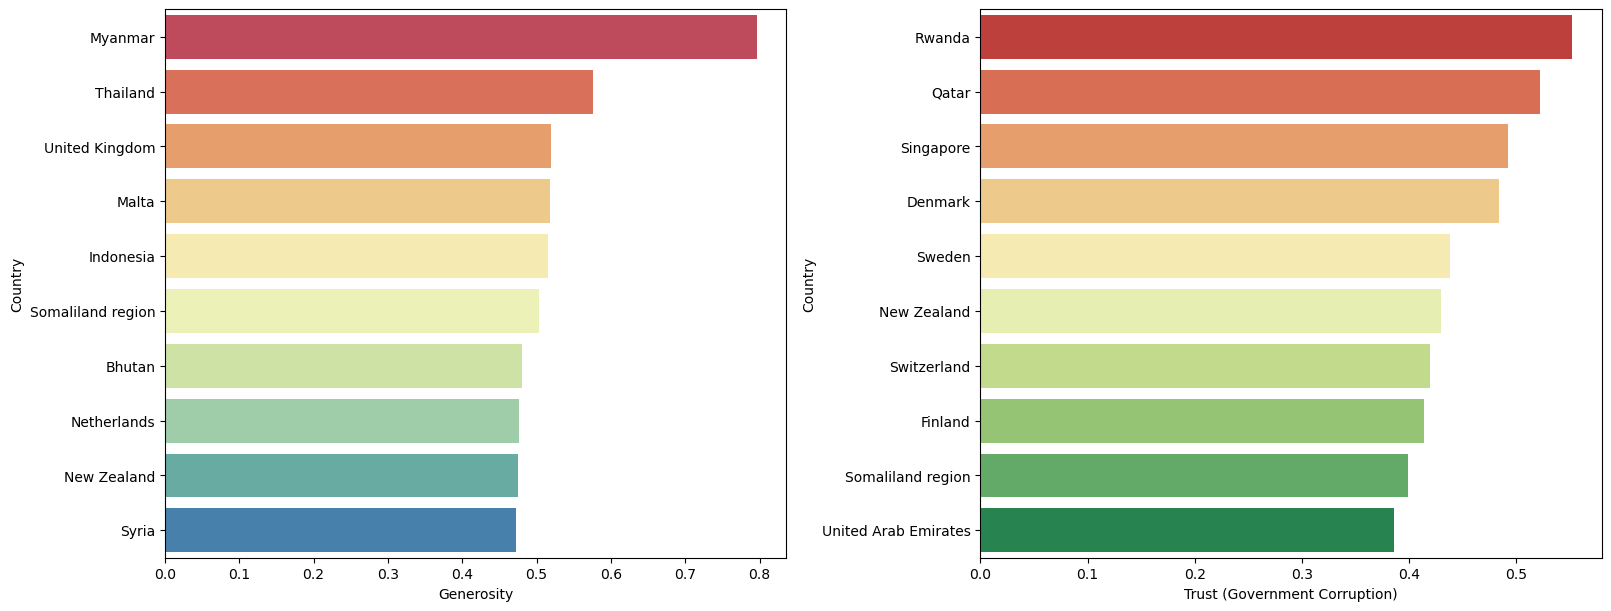

In [130]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(16,6))

sns.barplot(x='Generosity', y='Country', 
            data = df.nlargest(10,'Generosity'), ax=axes[0], palette='Spectral')

sns.barplot(x='Trust (Government Corruption)', y='Country',
            data = df.nlargest(10,'Trust (Government Corruption)'), ax=axes[1], palette='RdYlGn')

## Generate a heatmap to identify the correlation

In [131]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [132]:
numeric_df = df.select_dtypes(include=[float, int])

In [133]:
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                               Happiness Rank  Happiness Score  \
Happiness Rank                       1.000000        -0.992105   
Happiness Score                     -0.992105         1.000000   
Standard Error                       0.158516        -0.177254   
Economy (GDP per Capita)            -0.785267         0.780966   
Family                              -0.733644         0.740605   
Health (Life Expectancy)            -0.735613         0.724200   
Freedom                             -0.556886         0.568211   
Trust (Government Corruption)       -0.372315         0.395199   
Generosity                          -0.160142         0.180319   
Dystopia Residual                   -0.521999         0.530474   

                               Standard Error  Economy (GDP per Capita)  \
Happiness Rank                       0.158516                 -0.785267   
Happiness Score                     -0.177254                  0.780966   
Standard Error                       1.000000   

<function matplotlib.pyplot.show(close=None, block=None)>

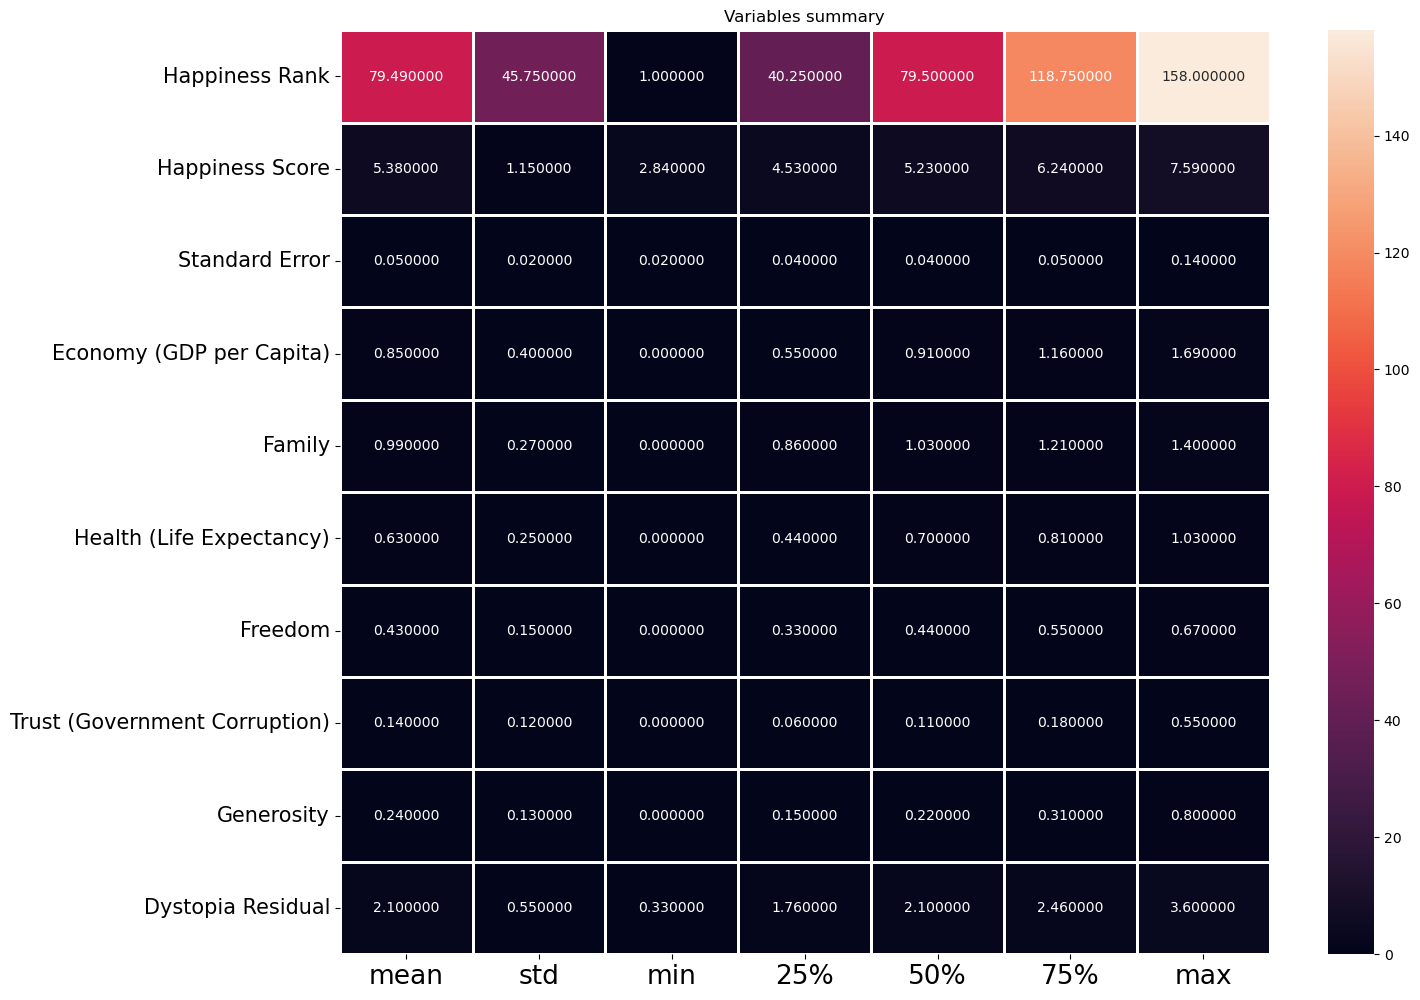

In [134]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=19)
plt.yticks(fontsize=15)
plt.title("Variables summary")
plt.show

Now I want to give a category to each country as High,Mid and Low according to their happiness scores.Thus we have to find out the bound in which these categories shall lie in.

In [135]:
print('max:',df['Happiness Score'].max())
print('min:',df['Happiness Score'].min())
add=df['Happiness Score'].max()-df['Happiness Score'].min()
grp=round(add/3,3)
print('range difference:',(grp))

max: 7.587
min: 2.839
range difference: 1.583


In [136]:
low=df['Happiness Score'].min()+grp
mid=low+grp

print('upper bound of Low grp',low)
print('upper bound of Mid grp',mid)
print('upper bound of High grp','max:',df['Happiness Score'].max())

upper bound of Low grp 4.422
upper bound of Mid grp 6.005
upper bound of High grp max: 7.587


# Conclusion

In conclusion, this project has provided a comprehensive analysis of happiness scores around the world, highlighting the importance of economic, social, and health factors in determining individual and societal well-being. The findings suggest that promoting economic prosperity, social support networks, and access to healthcare can contribute to higher levels of happiness, while reducing corruption can help ensure that these gains are sustainable over time. By prioritizing happiness as a key goal for individuals, communities, and policymakers, we can work towards creating a world that is more just, equitable, and fulfilling for all.